### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep='\t', index_col=0)
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3107 non-null   object
 6   sideEffectsReview  3105 non-null   object
 7   commentsReview     3099 non-null   object
dtypes: int64(1), object(7)
memory usage: 218.5+ KB


In [6]:
df.describe(include="all")

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107,3107.000000,3107,3107,3106,3107,3105,3099
unique,502,NaN,5,5,1426,3032,2814,3047
top,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,63,NaN,1330,1019,236,20,112,6
mean,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [9]:
df['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [10]:
pd.get_dummies(df['effectiveness'])

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective
2202,0,1,0,0,0
3117,0,1,0,0,0
1146,0,1,0,0,0
3947,0,0,0,1,0
1951,0,0,0,1,0
...,...,...,...,...,...
1039,0,1,0,0,0
3281,0,0,1,0,0
1664,0,0,0,1,0
2621,1,0,0,0,0


In [11]:
map_effectiveness = {
    "Ineffective": 0,
    "Marginally Effective": 1,
    "Moderately Effective": 2,
    "Considerably Effective": 3,
    "Highly Effective": 4
}

df['effectiveneess_int'] = df['effectiveness'].map(map_effectiveness)
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveneess_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1


In [12]:
df['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [13]:
map_sideEffects = {
    "No Side Effects": 0,
    "Mild Side Effects": 1,
    "Moderate Side Effects": 2,
    "Severe Side Effects": 3,
    "Extremely Severe Side Effects": 4
}

df['sideEffects_int'] = df['sideEffects'].map(map_sideEffects)
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveneess_int,sideEffects_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,1
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4,3
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,0
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1,3


In [15]:
X = df[['rating', 'effectiveneess_int', 'sideEffects_int']]
print(X.shape)

(3107, 3)


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

#### Genera el K Means 

In [16]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [18]:
km_list = [KMeans(n_clusters=k, n_init=10, random_state=0).fit(X) for k in range(2,30)]
km_list

[KMeans(n_clusters=2, n_init=10, random_state=0),
 KMeans(n_clusters=3, n_init=10, random_state=0),
 KMeans(n_clusters=4, n_init=10, random_state=0),
 KMeans(n_clusters=5, n_init=10, random_state=0),
 KMeans(n_clusters=6, n_init=10, random_state=0),
 KMeans(n_clusters=7, n_init=10, random_state=0),
 KMeans(n_init=10, random_state=0),
 KMeans(n_clusters=9, n_init=10, random_state=0),
 KMeans(n_clusters=10, n_init=10, random_state=0),
 KMeans(n_clusters=11, n_init=10, random_state=0),
 KMeans(n_clusters=12, n_init=10, random_state=0),
 KMeans(n_clusters=13, n_init=10, random_state=0),
 KMeans(n_clusters=14, n_init=10, random_state=0),
 KMeans(n_clusters=15, n_init=10, random_state=0),
 KMeans(n_clusters=16, n_init=10, random_state=0),
 KMeans(n_clusters=17, n_init=10, random_state=0),
 KMeans(n_clusters=18, n_init=10, random_state=0),
 KMeans(n_clusters=19, n_init=10, random_state=0),
 KMeans(n_clusters=20, n_init=10, random_state=0),
 KMeans(n_clusters=21, n_init=10, random_state=0),
 K

In [21]:
silhouette_score_list = [silhouette_score(X, model.labels_) for model in km_list]
silhouette_score_list

[0.6190969508782411,
 0.4541665291694327,
 0.4164004027525524,
 0.4152173517501398,
 0.4116968068331206,
 0.3851674527566422,
 0.3860199607308518,
 0.4047336257017505,
 0.40324801660496123,
 0.4016267088275377,
 0.4129103136601909,
 0.42830176275839543,
 0.46723555529019445,
 0.4653969867587679,
 0.4639319700896366,
 0.4658172827951396,
 0.5051065681991771,
 0.5102162821698935,
 0.5297464869276614,
 0.5448619320641453,
 0.5205556505492893,
 0.5630498439686591,
 0.5732637127230749,
 0.5718410325700753,
 0.5972215762582895,
 0.6129339205372897,
 0.6193897786315993,
 0.6140910700429688]

Text(0, 0.5, 'silhouette_score')

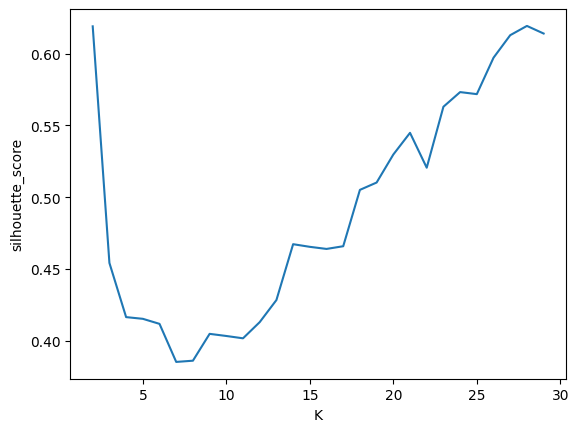

In [22]:
plt.plot(range(2,30), silhouette_score_list)
plt.xlabel('K')
plt.ylabel('silhouette_score')

Text(0, 0.5, 'inertias')

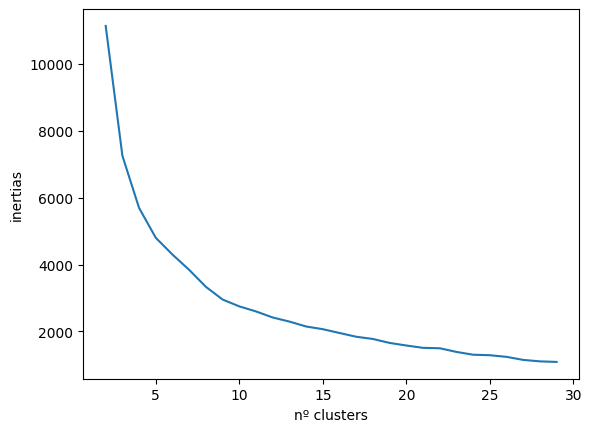

In [23]:
inertias = [model.inertia_ for model in km_list]
plt.plot(range(2,30), inertias)
plt.xlabel('nº clusters')
plt.ylabel('inertias')


Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [41]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0).fit(X)
kmeans.labels_

array([1, 1, 0, ..., 1, 0, 1])

In [42]:
df_clusters = pd.DataFrame(kmeans.labels_, columns=['Cluster'])
df_clusters

,Cluster
0,1
1,1
2,0
3,1
4,1
...,...
3102,0
3103,1
3104,1
3105,0


In [43]:
df_clusters['Cluster'].value_counts()

0    2280
1     827
Name: Cluster, dtype: int64

<Axes: ylabel='Cluster'>

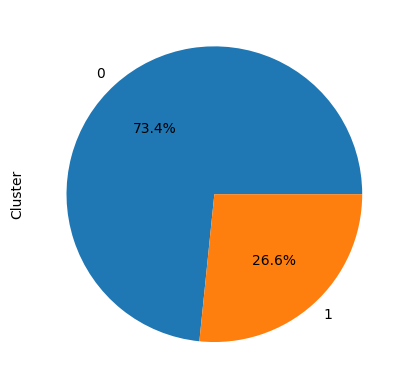

In [44]:
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")

In [45]:
X['cluster'] = kmeans.labels_

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_3780\3835265520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.labels_


In [47]:
X.groupby('cluster').describe()

rating                                                 \
          count      mean       std  min  25%  50%   75%   max   
cluster                                                          
0        2280.0  8.575877  1.264993  5.0  8.0  9.0  10.0  10.0   
1         827.0  2.678356  1.574787  1.0  1.0  3.0   4.0   6.0   

        effectiveneess_int            ...           sideEffects_int            \
                     count      mean  ...  75%  max           count      mean   
cluster                               ...                                       
0                   2280.0  3.421491  ...  4.0  4.0          2280.0  0.880263   
1                    827.0  1.596131  ...  3.0  4.0           827.0  2.475212   

                                            
              std  min  25%  50%  75%  max  
cluster                                     
0        0.839020  0.0  0.0  1.0  1.0  4.0  
1        1.184158  0.0  2.0  3.0  3.0  4.0  

[2 rows x 24 columns]

In [49]:
kmeans = KMeans(n_clusters=8, n_init=10, random_state=0).fit(X)
X['cluster'] = kmeans.labels_
X.groupby('cluster').mean()

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_3780\194840488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.labels_


,rating,effectiveneess_int,sideEffects_int
cluster,,,
0,9.906634,3.920147,0.390663
1,7.489426,3.438066,2.217523
2,1.728723,2.957447,3.281915
3,8.513021,3.397135,0.805990
4,6.733696,2.345109,0.915761
5,2.521739,0.543478,0.942029
6,1.340517,0.262931,3.288793
7,4.570896,2.343284,2.000000
